In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
image = pd.read_csv('test.csv').ix[0].values.reshape(-1,28,28,1)[0,:,:,0]

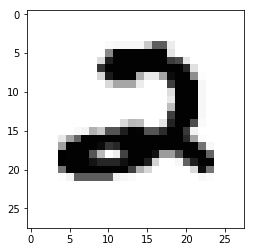

In [3]:
g = plt.imshow(image, cmap='Greys')

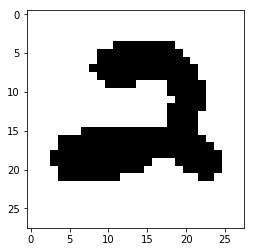

In [4]:
from skan.pre import threshold
smooth_radius = 2
threshold_radius = 1
binary0 = threshold(image, sigma=smooth_radius, radius=threshold_radius)

fig, ax = plt.subplots()
ax.imshow(binary0, cmap='Greys');

In [5]:
from skimage import morphology
skeleton0 = morphology.skeletonize(binary0)

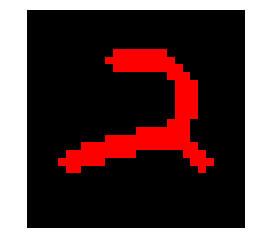

In [6]:
from skan import draw

fig, ax = plt.subplots()
draw.overlay_skeleton_2d(image, skeleton0, dilate=1, axes=ax);

In [7]:
from skan import csr

pixel_graph, coordinates, degrees = csr.skeleton_to_csgraph(skeleton0)

In [8]:
branch_data = csr.summarise(skeleton0, spacing=1)
branch_data.head()

,skeleton-id,node-id-0,node-id-1,branch-distance,branch-type,img-coord-0-0,img-coord-0-1,img-coord-1-0,img-coord-1-1,coord-0-0,coord-0-1,coord-1-0,coord-1-1,euclidean-distance
0,1,1,16,17.356527,1,6,11,15,18,6.000000,11.000000,15.666667,18.666667,12.337837
1,1,16,32,14.942314,1,15,18,19,5,15.666667,18.666667,19.000000,5.000000,14.067299
2,1,16,34,4.714045,1,15,18,19,22,15.666667,18.666667,19.000000,22.000000,4.714045


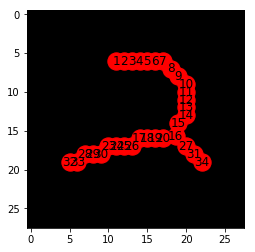

In [9]:
g, c, _ = csr.skeleton_to_csgraph(skeleton0)
draw.overlay_skeleton_networkx(g, c, image=skeleton0);

In [10]:
branch_data

,skeleton-id,node-id-0,node-id-1,branch-distance,branch-type,img-coord-0-0,img-coord-0-1,img-coord-1-0,img-coord-1-1,coord-0-0,coord-0-1,coord-1-0,coord-1-1,euclidean-distance
0,1,1,16,17.356527,1,6,11,15,18,6.000000,11.000000,15.666667,18.666667,12.337837
1,1,16,32,14.942314,1,15,18,19,5,15.666667,18.666667,19.000000,5.000000,14.067299
2,1,16,34,4.714045,1,15,18,19,22,15.666667,18.666667,19.000000,22.000000,4.714045


In [11]:
from skimage import data
from skimage.util import invert

image = invert(data.horse())

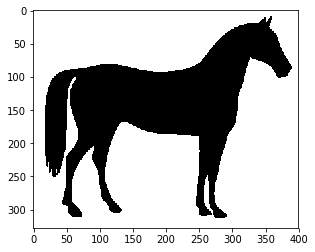

In [12]:
g = plt.imshow(image, cmap='Greys')

In [13]:
binary = image
skeleton = morphology.skeletonize(binary)

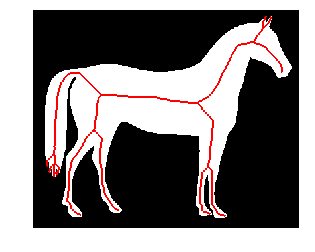

In [14]:
fig, ax = plt.subplots()
draw.overlay_skeleton_2d(image, skeleton, dilate=1, axes=ax);

In [15]:
pixel_graph, coordinates, degrees = csr.skeleton_to_csgraph(skeleton)

branch_data = csr.summarise(skeleton, spacing=1)
branch_data.head()

,skeleton-id,node-id-0,node-id-1,branch-distance,branch-type,img-coord-0-0,img-coord-0-1,img-coord-1-0,img-coord-1-1,coord-0-0,coord-0-1,coord-1-0,coord-1-1,euclidean-distance
0,1,1,34,20.086632,1,9,350,27,345,9.000000,350.000000,27.000000,345.250000,18.616189
1,1,3,34,22.157700,1,10,357,27,345,10.000000,357.000000,27.000000,345.250000,20.665491
2,1,34,36,26.028731,2,27,345,47,331,27.000000,345.250000,47.666667,331.666667,24.730913
3,1,36,38,141.609678,2,47,331,139,246,47.666667,331.666667,139.333333,246.666667,125.011111
4,1,36,177,69.140452,1,47,331,93,373,47.666667,331.666667,93.000000,373.000000,61.347824
